In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from kaggle.api.kaggle_api_extended import KaggleApi
#from ydata_profiling import ProfileReport
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import levene

In [67]:
api = KaggleApi()
api.authenticate()

# Define dataset and destination
dataset_url = 'ddosad/auto-sales-data'
download_path = 'datasets/Automobile-Sales'  # Specify destination folder

# Download dataset
api.dataset_download_files(dataset_url, path=download_path, unzip=True)

print(f"Dataset downloaded to: {os.path.abspath(download_path)}")

Dataset URL: https://www.kaggle.com/datasets/ddosad/auto-sales-data
Dataset downloaded to: C:\Users\moshe\course\datasets\Automobile-Sales


In [69]:
api.dataset_download_files(dataset_url, path=download_path, unzip=True, force=False)

Dataset URL: https://www.kaggle.com/datasets/ddosad/auto-sales-data


In [70]:
dataset_file = 'datasets/Automobile-Sales/Auto_Sales_data.csv'

In [71]:
L = 2500 # num of rows to read
df = pd.read_csv(dataset_file, nrows=L)

In [72]:
df.shape

(2500, 20)

In [73]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [74]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [75]:
df.dtypes

ORDERNUMBER               int64
QUANTITYORDERED           int64
PRICEEACH               float64
ORDERLINENUMBER           int64
SALES                   float64
ORDERDATE                object
DAYS_SINCE_LASTORDER      int64
STATUS                   object
PRODUCTLINE              object
MSRP                      int64
PRODUCTCODE              object
CUSTOMERNAME             object
PHONE                    object
ADDRESSLINE1             object
CITY                     object
POSTALCODE               object
COUNTRY                  object
CONTACTLASTNAME          object
CONTACTFIRSTNAME         object
DEALSIZE                 object
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2500 non-null   int64  
 1   QUANTITYORDERED       2500 non-null   int64  
 2   PRICEEACH             2500 non-null   float64
 3   ORDERLINENUMBER       2500 non-null   int64  
 4   SALES                 2500 non-null   float64
 5   ORDERDATE             2500 non-null   object 
 6   DAYS_SINCE_LASTORDER  2500 non-null   int64  
 7   STATUS                2500 non-null   object 
 8   PRODUCTLINE           2500 non-null   object 
 9   MSRP                  2500 non-null   int64  
 10  PRODUCTCODE           2500 non-null   object 
 11  CUSTOMERNAME          2500 non-null   object 
 12  PHONE                 2500 non-null   object 
 13  ADDRESSLINE1          2500 non-null   object 
 14  CITY                  2500 non-null   object 
 15  POSTALCODE           

In [77]:
df.nunique()

ORDERNUMBER              296
QUANTITYORDERED           56
PRICEEACH               1712
ORDERLINENUMBER           18
SALES                   2452
ORDERDATE                245
DAYS_SINCE_LASTORDER    1686
STATUS                     6
PRODUCTLINE                7
MSRP                      78
PRODUCTCODE              100
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [78]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [79]:
df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [25]:
df['DEALSIZE'].unique()

<StringArray>
['Small', 'Medium', 'Large']
Length: 3, dtype: string

In [27]:
df['DEALSIZE'].unique()

['Small', 'Medium', 'Large']
Categories (3, string): [Large, Medium, Small]

In [80]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [81]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2500 non-null   Int64  
 1   QUANTITYORDERED       2500 non-null   Int64  
 2   PRICEEACH             2500 non-null   Float64
 3   ORDERLINENUMBER       2500 non-null   Int64  
 4   SALES                 2500 non-null   Float64
 5   ORDERDATE             2500 non-null   string 
 6   DAYS_SINCE_LASTORDER  2500 non-null   Int64  
 7   STATUS                2500 non-null   string 
 8   PRODUCTLINE           2500 non-null   string 
 9   MSRP                  2500 non-null   Int64  
 10  PRODUCTCODE           2500 non-null   string 
 11  CUSTOMERNAME          2500 non-null   string 
 12  PHONE                 2500 non-null   string 
 13  ADDRESSLINE1          2500 non-null   string 
 14  CITY                  2500 non-null   string 
 15  POSTALCODE           

In [12]:
for col in df:
    if df[col].nunique() < 20:
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ORDERNUMBER           2500 non-null   Int64   
 1   QUANTITYORDERED       2500 non-null   Int64   
 2   PRICEEACH             2500 non-null   Float64 
 3   ORDERLINENUMBER       2500 non-null   category
 4   SALES                 2500 non-null   Float64 
 5   ORDERDATE             2500 non-null   string  
 6   DAYS_SINCE_LASTORDER  2500 non-null   Int64   
 7   STATUS                2500 non-null   category
 8   PRODUCTLINE           2500 non-null   category
 9   MSRP                  2500 non-null   Int64   
 10  PRODUCTCODE           2500 non-null   string  
 11  CUSTOMERNAME          2500 non-null   string  
 12  PHONE                 2500 non-null   string  
 13  ADDRESSLINE1          2500 non-null   string  
 14  CITY                  2500 non-null   string  
 15  POST

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2500.0,10259.0952,91.773211,10100.0,10181.0,10263.0,10332.0,10425.0
QUANTITYORDERED,2500.0,35.0292,9.791113,6.0,27.0,34.0,43.0,97.0
PRICEEACH,2500.0,102.554508,43.062477,26.88,69.16,97.385,130.6725,252.87
ORDERLINENUMBER,2500.0,6.4468,4.20217,1.0,3.0,6.0,9.0,18.0
SALES,2500.0,3599.409256,1882.139946,482.13,2202.9525,3223.82,4602.74,14082.8
DAYS_SINCE_LASTORDER,2500.0,1635.5228,753.315187,42.0,1014.75,1641.0,2259.25,3321.0
MSRP,2500.0,102.3656,41.12628,33.0,68.0,99.0,132.0,214.0


In [36]:
plt.figure(figsize=(10, 5))

sns.histplot(b2b_df['Revenue'], color='blue', label='USA', kde=True, stat="density")
sns.histplot(b2c_df['Revenue'], color='orange', label='France', kde=True, stat="density")

NameError: name 'b2b_df' is not defined

<Figure size 1000x500 with 0 Axes>

In [83]:
df[df['COUNTRY']=='USA'].describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,855.0,855.0,855.0,855.0,855.0,855.0,855.0
mean,10258.619883,35.512281,102.97145,6.359064,3651.106772,1630.774269,102.512281
std,88.038164,9.77688,43.622409,4.147001,1902.444002,756.99188,41.398158
min,10100.0,6.0,28.29,1.0,541.14,111.0,33.0
25%,10183.0,27.0,70.15,3.0,2260.44,998.0,68.0
50%,10264.0,36.0,98.18,6.0,3286.49,1646.0,99.0
75%,10324.0,44.0,130.825,9.0,4638.93,2280.5,127.0
max,10422.0,76.0,250.73,18.0,14082.8,3204.0,214.0


In [40]:
df[df['COUNTRY']=='France'].describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,DAYS_SINCE_LASTORDER,MSRP
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,10254.795455,35.459091,102.195227,3673.198000,1343.090909,108.177273
std,95.111609,10.623192,43.543562,2035.777336,615.590218,44.004674
min,10114.000000,19.000000,29.210000,694.600000,127.000000,33.000000
25%,10180.000000,27.000000,67.927500,2165.865000,817.750000,69.000000
50%,10241.000000,35.000000,97.800000,3290.835000,1350.000000,109.000000
75%,10343.000000,43.000000,132.355000,4698.810000,1808.000000,141.000000
max,10425.000000,97.000000,226.580000,11739.700000,2662.000000,214.000000


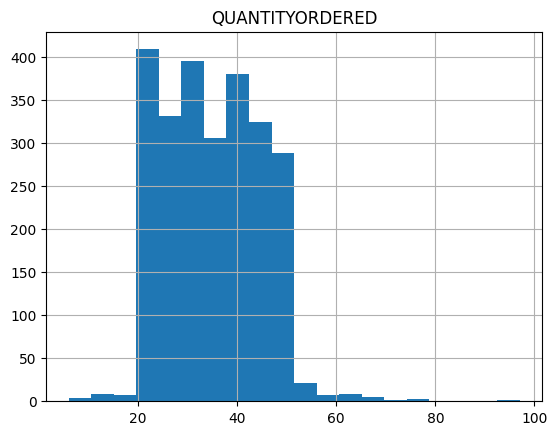

In [84]:
df[['QUANTITYORDERED']].hist(bins=20);

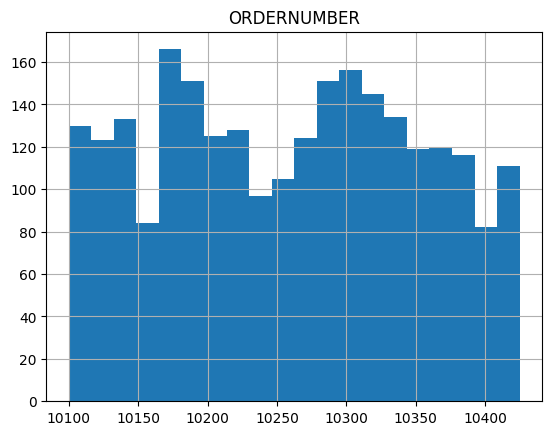

In [13]:
df[['ORDERNUMBER']].hist(bins=20);

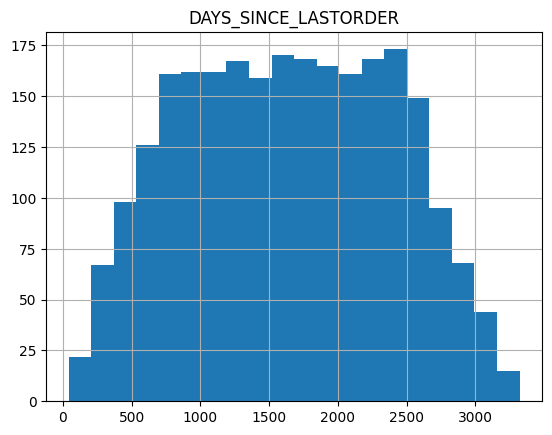

In [85]:
df[['DAYS_SINCE_LASTORDER']].hist(bins=20);

In [86]:
df[df['COUNTRY']=='USA'].describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,855.0,10258.619883,88.038164,10100.0,10183.0,10264.0,10324.0,10422.0
QUANTITYORDERED,855.0,35.512281,9.77688,6.0,27.0,36.0,44.0,76.0
PRICEEACH,855.0,102.97145,43.622409,28.29,70.15,98.18,130.825,250.73
ORDERLINENUMBER,855.0,6.359064,4.147001,1.0,3.0,6.0,9.0,18.0
SALES,855.0,3651.106772,1902.444002,541.14,2260.44,3286.49,4638.93,14082.8
DAYS_SINCE_LASTORDER,855.0,1630.774269,756.99188,111.0,998.0,1646.0,2280.5,3204.0
MSRP,855.0,102.512281,41.398158,33.0,68.0,99.0,127.0,214.0


In [28]:
from scipy.stats import kurtosis

# Add the 'TOTALPRICE' column
df['TOTALPRICE'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Group by 'Category' and apply multiple aggregations to multiple columns
result = df.groupby('DEALSIZE', observed=True).agg(
    Mean_Unit_Price=('PRICEEACH', 'mean'),
    Median_Unit_Price=('PRICEEACH', 'median'),
    Kurtosis_Unit_Price=('PRICEEACH', lambda x: kurtosis(x, fisher=True, bias=False)),
    Mean_Total_Price=('TOTALPRICE', 'mean'),
    Median_Total_Price=('TOTALPRICE', 'median'),
    Kurtosis_Total_Price=('TOTALPRICE', lambda x: kurtosis(x, fisher=True, bias=False))
)

result



,Mean_Unit_Price,Median_Unit_Price,Kurtosis_Unit_Price,Mean_Total_Price,Median_Total_Price,Kurtosis_Total_Price
DEALSIZE,,,,,,
Large,181.551769,180.950,0.022296,8302.696667,8008.560,3.466345
Medium,121.912381,119.000,0.167966,4440.280864,4195.800,-0.720377
Small,70.600287,66.885,-0.005926,2043.553680,2089.155,-0.824572


In [87]:
 #Checking duplicate values
df.duplicated().sum()
 

np.int64(0)

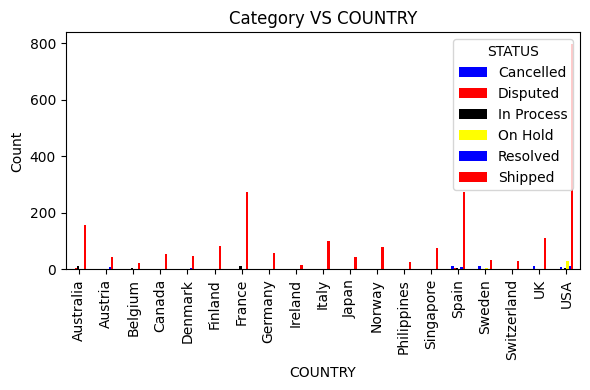

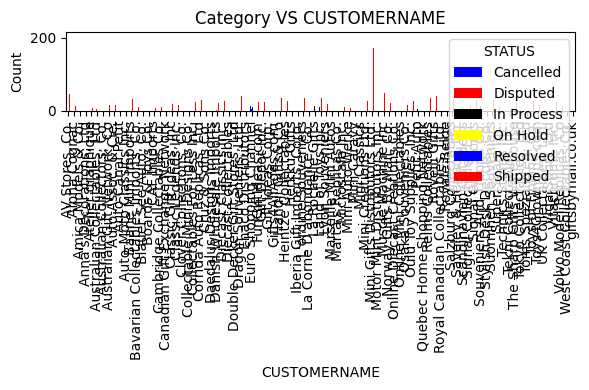

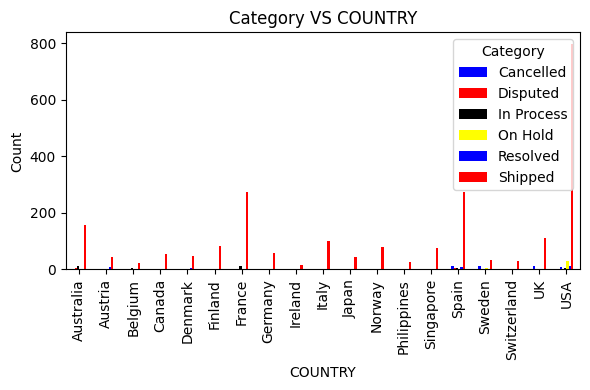

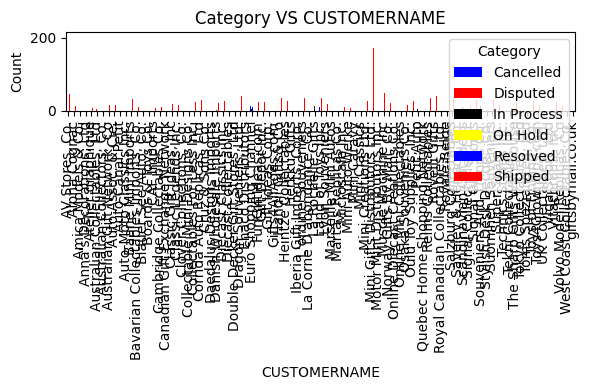

In [88]:
categorical_cols = [ 'COUNTRY', 'CUSTOMERNAME']

for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['STATUS'])
    
    cross_tab.plot(kind='bar', stacked=False, 
                   color=['blue', 'red','black','yellow'],  # Blue is "No", red is "Yes"
                   figsize=(6, 4))
    
    plt.title(f'Category VS {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='STATUS', loc='upper right')
    plt.tight_layout()
categorical_cols = [ 'COUNTRY', 'CUSTOMERNAME']

for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['STATUS'])
    
    cross_tab.plot(kind='bar', stacked=False, 
                   color=['blue', 'red','black','yellow'],  # Blue is "No", red is "Yes"
                   figsize=(6, 4))
    
    plt.title(f'Category VS {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Category', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
 ORDERNUMBER           100 non-null    int64  
 1   QUANTITYORDERED       100 non-null    int64  
 2   PRICEEACH             100 non-null    float64
 3   ORDERLINENUMBER       100 non-null    int64  
 4   SALES                 100 non-null    float64
 5   ORDERDATE             100 non-null    object 
 6   DAYS_SINCE_LASTORDER  100 non-null    int64  
 7   STATUS                100 non-null    object 
 8   PRODUCTLINE           100 non-null    object 
 9   MSRP                  100 non-null    int64  
 10  PRODUCTCODE           100 non-null    object 
 11  CUSTOMERNAME          100 non-null    object 
 12  PHONE                 100 non-null    object 
 13  ADDRESSLINE1          100 non-null    object 
 14  CITY                  100 non-null    object 
 15  POSTALCODE            100 non-null    object 
 16  COUNTRY               100 non-null    object 
 17  CONTACTLASTNAME       100 non-null    object 
 18  CONTACTFIRSTNAME      100 non-null    object 
 19  DEALSIZE              100 non-null    object 

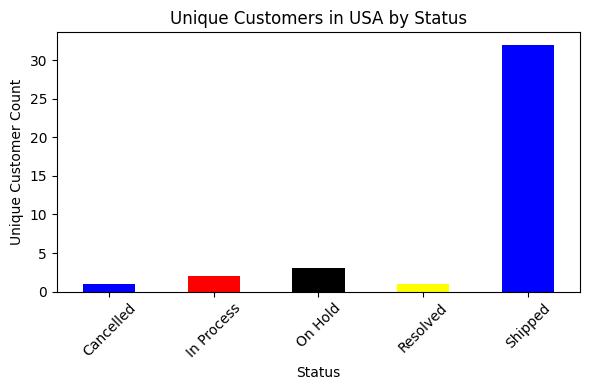

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# בחר מדינה להצגה (אפשר לשנות כאן)
selected_country = "USA"  # שנה את שם המדינה לפי הצורך

# סינון הלקוחות לפי המדינה הנבחרת
filtered_df = df[df['COUNTRY'] == selected_country]

# יצירת טבלת ציר עם ספירת לקוחות ייחודיים לפי סטטוס
cross_tab = filtered_df.groupby('STATUS')['CUSTOMERNAME'].nunique()

# יצירת תרשים
cross_tab.plot(kind='bar', color=['blue', 'red', 'black', 'yellow'], figsize=(6, 4))

plt.title(f'Unique Customers in {selected_country} by Status')
plt.ylabel('Unique Customer Count')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

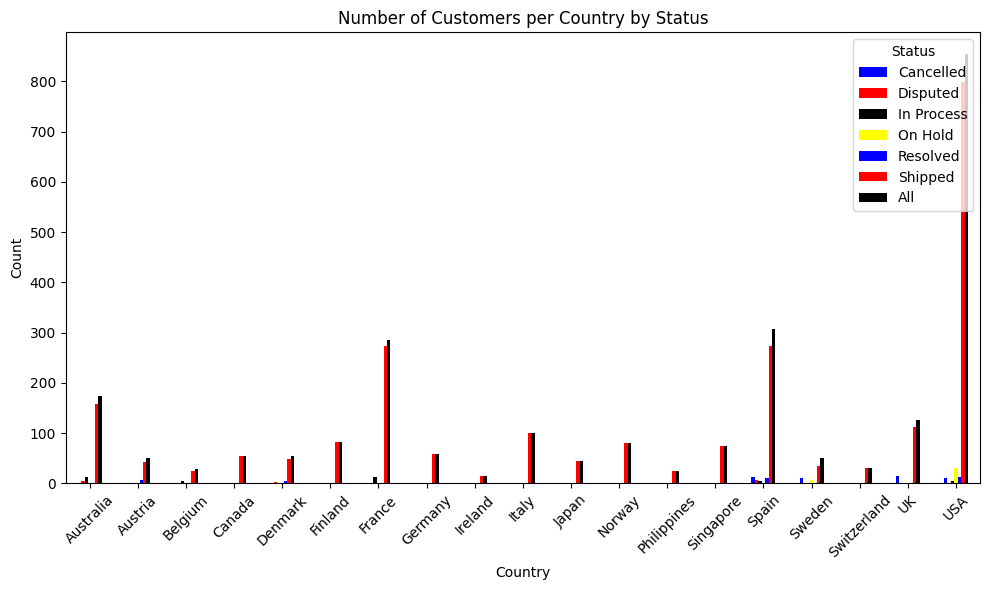

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# יצירת טבלת ציר לספירת מספר הלקוחות הייחודיים לכל מדינה לפי STATUS
cross_tab = pd.crosstab(df['COUNTRY'], df['STATUS'], margins=True)

# יצירת תרשים
cross_tab.drop('All').plot(kind='bar', stacked=False, 
                           color=['blue', 'red', 'black', 'yellow'], 
                           figsize=(10, 6))

plt.title('Number of Customers per Country by Status')
plt.ylabel('Count')
plt.xlabel('Country')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=45)  # סיבוב שמות המדינות
plt.tight_layout()
plt.show()

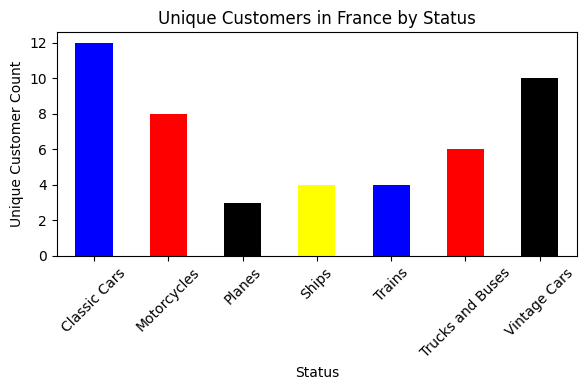

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# בחר מדינה להצגה (אפשר לשנות כאן)
selected_country = "France"  # שנה את שם המדינה לפי הצורך

# סינון הלקוחות לפי המדינה הנבחרת
filtered_df = df[df['COUNTRY'] == selected_country]

# יצירת טבלת ציר עם ספירת לקוחות ייחודיים לפי סטטוס
cross_tab = filtered_df.groupby('PRODUCTLINE')['CUSTOMERNAME'].nunique()

# יצירת תרשים
cross_tab.plot(kind='bar', color=['blue', 'red', 'black', 'yellow'], figsize=(6, 4))

plt.title(f'Unique Customers in {selected_country} by Status')
plt.ylabel('Unique Customer Count')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

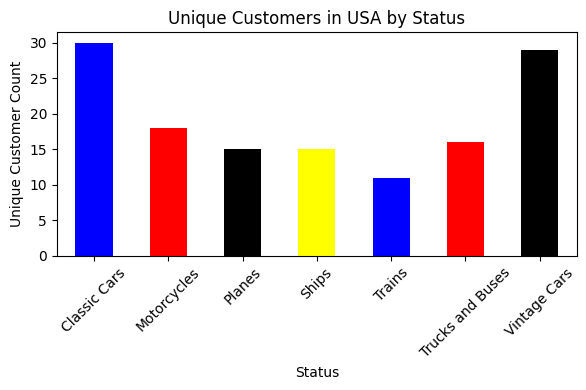

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# בחר מדינה להצגה (אפשר לשנות כאן)
selected_country = "USA"  # שנה את שם המדינה לפי הצורך

# סינון הלקוחות לפי המדינה הנבחרת
filtered_df = df[df['COUNTRY'] == selected_country]

# יצירת טבלת ציר עם ספירת לקוחות ייחודיים לפי סטטוס
cross_tab = filtered_df.groupby('PRODUCTLINE')['CUSTOMERNAME'].nunique()

# יצירת תרשים
cross_tab.plot(kind='bar', color=['blue', 'red', 'black', 'yellow'], figsize=(6, 4))

plt.title(f'Unique Customers in {selected_country} by Status')
plt.ylabel('Unique Customer Count')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

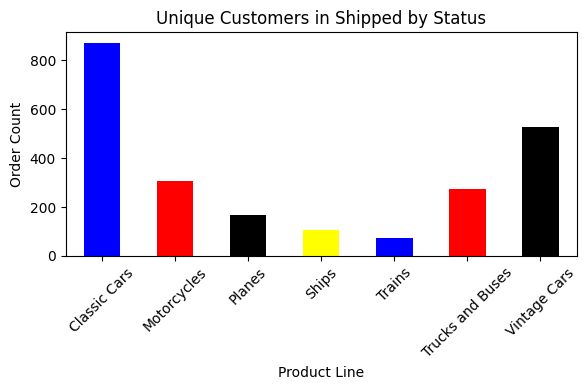

In [92]:
#QUANTITYORDERED
#STATUS

import pandas as pd
import matplotlib.pyplot as plt

# בחר מדינה להצגה (אפשר לשנות כאן)
order_status = "Shipped"  # שנה את שם המדינה לפי הצורך

# סינון הלקוחות לפי המדינה הנבחרת
filtered_df = df[df['STATUS'] == order_status]

# יצירת טבלת ציר עם ספירת לקוחות ייחודיים לפי סטטוס
cross_tab = filtered_df.groupby('PRODUCTLINE')['DEALSIZE'].count()

# יצירת תרשים
cross_tab.plot(kind='bar', color=['blue', 'red', 'black', 'yellow'], figsize=(6, 4))

plt.title(f'Unique Customers in {order_status} by Status')
plt.ylabel('Order Count')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

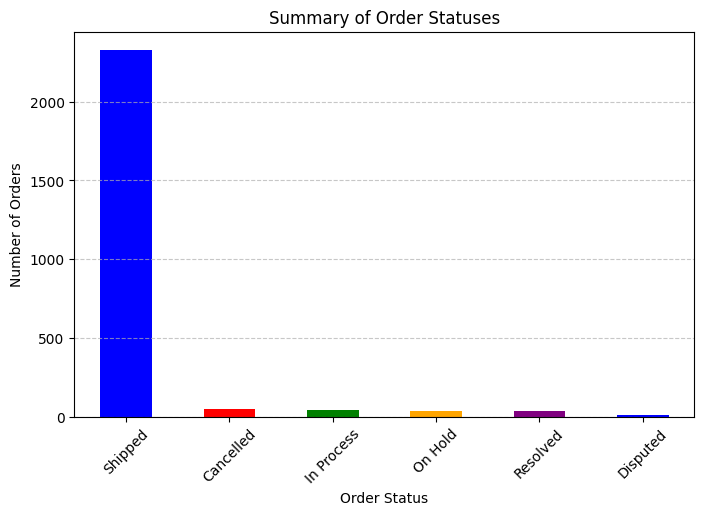

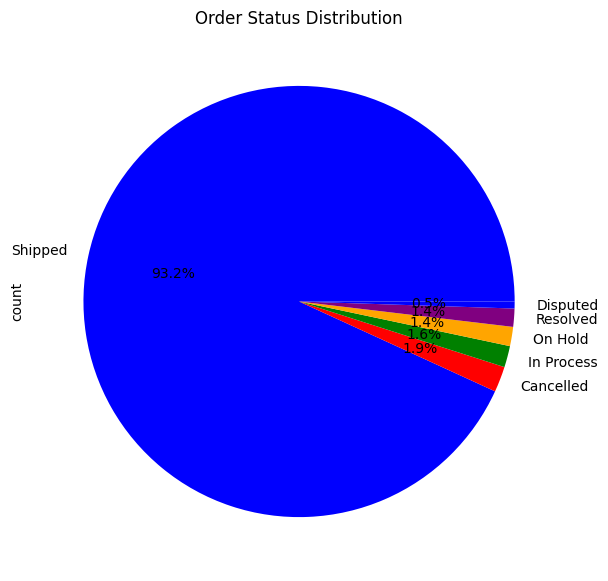

In [94]:
# Count the number of orders per status
status_counts = df['STATUS'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple'])

# Add labels and title
plt.title("Summary of Order Statuses")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

plt.figure(figsize=(7, 7))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red', 'green', 'orange', 'purple'])

# Add title
plt.title("Order Status Distribution")

# Show the plot
plt.show()

Available countries: <StringArray>
[        'USA',      'FRANCE',      'NORWAY',   'AUSTRALIA',     'FINLAND',
     'AUSTRIA',          'UK',       'SPAIN',      'SWEDEN',   'SINGAPORE',
      'CANADA',       'JAPAN',       'ITALY',     'DENMARK',     'BELGIUM',
 'PHILIPPINES',     'GERMANY', 'SWITZERLAND',     'IRELAND']
Length: 19, dtype: string
Cities in UK : <StringArray>
['Liverpool', 'London', 'Cowes', 'Manchester']
Length: 4, dtype: string


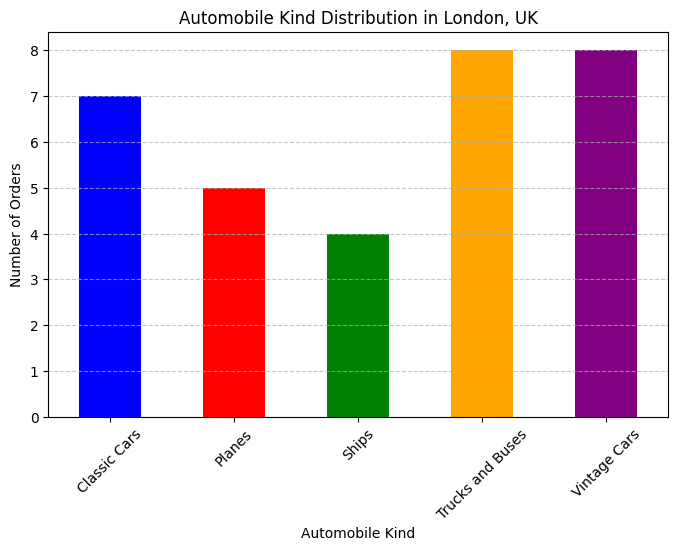

In [106]:
df['CITY'] = df['CITY'].str.strip().str.title()
df['COUNTRY'] = df['COUNTRY'].str.strip().str.upper()

# Check available countries and cities
print("Available countries:", df['COUNTRY'].unique())
selected_country = "UK"  # Change as needed
print("Cities in", selected_country, ":", df[df['COUNTRY'] == selected_country]['CITY'].unique())

# Select a country and city
selected_city = "London"  # Change as needed

# Filter data
filtered_df = df[(df['COUNTRY'] == selected_country) & (df['CITY'] == selected_city)]

# If no data, print message and exit
if filtered_df.empty:
    print(f"No data found for {selected_city}, {selected_country}. Check available cities above.")
else:
    # Group by PRODUCTLINE and count the number of orders
    city_product_counts = filtered_df.groupby('PRODUCTLINE').size()

    # Plot a bar chart
    plt.figure(figsize=(8, 5))
    city_product_counts.plot(kind='bar', color=['blue', 'red', 'green', 'orange', 'purple'])

    # Add labels and title
    plt.title(f"Automobile Kind Distribution in {selected_city}, {selected_country}")
    plt.xlabel("Automobile Kind")
    plt.ylabel("Number of Orders")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

<Axes: xlabel='Month'>

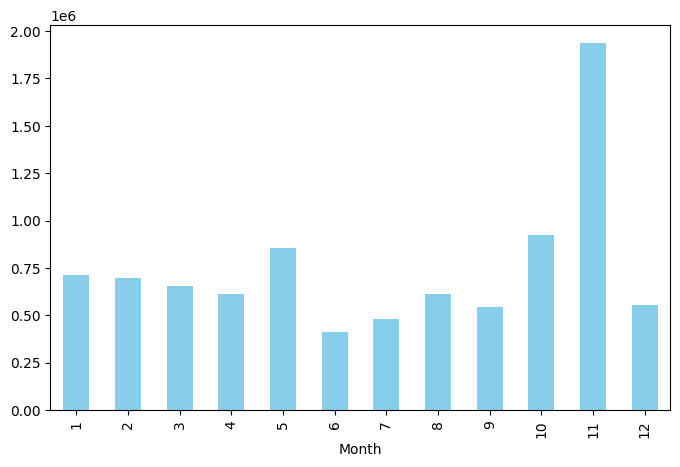

In [108]:
#display distribution of sales per month
# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Extract the month from ORDERDATE
df['Month'] = df['ORDERDATE'].dt.month

# Group by Month and sum the Sales
monthly_sales = df.groupby('Month')['SALES'].sum()

# Plot the sales distribution per month
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar', color='skyblue')